<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/Day33_Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  🚲 이 코드는 Kaggle에서 데이터를 받아와서 Colab에서 진행한 코드입니다

# Step 1  Import Library & Load Train&Test Dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Train Dataset 부터 확인
bike_df = pd.read_csv('/content/sample_data/bike_sharing_demand_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# Step 2 EDA (Exploratory Data Analysis)

데이터 이해,  데이터 전처리, 데이터 시각화, 변수간 관계분석, Feature Engineering

In [6]:
# Train Dataset 이해
bike_df.info()

# datetime 이 object라서, 숫자 변환 필요.  year, month, day, hour로 분류

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# Test Dataset 이해
bike_test_df=pd.read_csv('/content/sample_data/bike_sharing_demand_test.csv')
print(bike_test_df.shape)
bike_test_df.info()

# Train dataset과는 다르게 casual, registered, count가 없음.
# count는 target 이니 Test Dataset에 없는 게 맞고.
# casual & registed는 Test Dataset에 없으므로 Train dataset에서 삭제해야함

(6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
# Train Data 전처리

# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [9]:
# datetime은 필요없으니 삭제하고,  casual&registered도 삭제
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

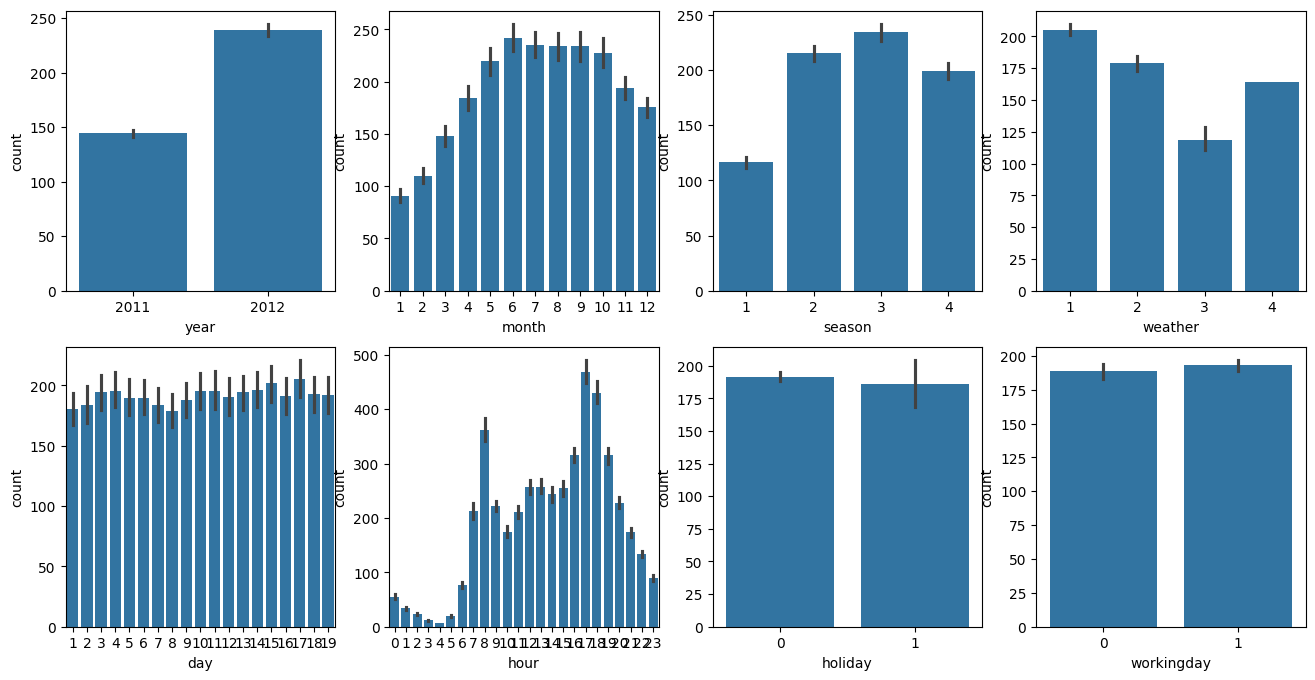

In [10]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

# Step 3 Train Dataset에 Model 적용및 평가

1. Import Models (Linear Regression,  Ridge, Lasso, XGBoost Regressor,,,)

2. Import Evaluation Metrics

3. Split Train Dataset into Train and Test

4. Train - Predict - Evaluate - Print Scores


In [21]:
# Import Models
from sklearn.linear_model import LinearRegression , Ridge , Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [22]:
# Import Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import root_mean_squared_error, root_mean_squared_log_error

# Evaluate and Print Metrics
def evaluate_regr(y,pred):
    # Ensure pred is clipped to be greater than or equal to 0
    pred = np.clip(pred, a_min=0, a_max=None)

    # Add 1 to both y and pred before calculating RMSLE to avoid log(0) or log(negative) errors
    rmsle_val = root_mean_squared_log_error(y + 1, pred + 1)
    rmse_val = root_mean_squared_error(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [23]:
# Train Dataset Split into Train 70% and Test 30%

from sklearn.model_selection import train_test_split , GridSearchCV
y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [24]:
# 분리된 dataset이 어떻게 생겼을까?

print(y_train.shape)
print(y_test.shape)
y_test.head(3)
#y_test.info()

(7620,)
(3266,)


,count
6638,244
7975,239
5915,229


In [25]:
# Linear Regression으로 train-predict-validate 진행

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 1.193, RMSE: 140.186, MAE: 104.193


In [28]:
# Ridge Regression 으로 train-predict-validate 진행

lr_reg = Ridge() # Use Ridge instead of ridge_reg
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 1.193, RMSE: 140.187, MAE: 104.192


In [29]:
# Lasso Regression 으로 train-predict-validate 진행

lr_reg = Lasso()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 1.186, RMSE: 140.263, MAE: 103.949


In [30]:
# XGBoostRegressor 으로 train-predict-validate 진행

lr_reg = XGBRegressor() # Create an instance of XGBRegressor
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test ,pred)

RMSLE: 0.448, RMSE: 45.418, MAE: 28.663


In [31]:
# LGBMRegressor 으로 train-predict-validate 진행

lr_reg = LGBMRegressor() # Create an instance of LGBMRegressor
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test ,pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 12
[LightGBM] [Info] Start training from score 190.349869
RMSLE: 0.395, RMSE: 43.223, MAE: 27.860


In [32]:
# 모델적용된 dataset이 어떻게 생겼을까?
print(y_test.shape)
y_test.head(3)

(3266,)


,count
6638,244
7975,239
5915,229


예측값과 실제값의 차이가 어느 정도 인 지, 확인해서, 차이가 많이 난다면,   scaling과  data 변환 생각해보기.

실제값의 분포 확인해서 left skewed 이면,  좀 더 정규분포화 하기 위해 log적용해서 model 돌려보기.

각 feature의 회귀계수를 확인해서, category 형 data 바꿔주기 위해,  전체에 one hot encoding 적용해서,  model 돌려보기

In [33]:
def get_top_error_data(y_test, pred, n_tops = 20): # 함수 생성 - DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록/
    result_df = pd.DataFrame(y_test.values, columns=['real_count']) # y_test 실제값을 dataframe으로 바꾸고, column name을 real_count로 변경
    result_df['predicted_count']= np.round(pred) # 예측값을 반올림해서 저장.
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count']) # 실제값에서 예측값을 빼서, 차이를 diff로 저장
    print(result_df.sort_values('diff', ascending=False)[:n_tops]) # diff(오차)를 내림차순으로 정렬해서, top 10개를 출력

get_top_error_data(y_test,pred,n_tops=20) # 함수 호출 - 오차가 크기 때문에, 원인을 파악

      real_count  predicted_count   diff
1622         370            708.0  338.0
565          512            205.0  307.0
1978         134            437.0  303.0
2592         565            277.0  288.0
212          689            408.0  281.0
716          537            275.0  262.0
2129         409            671.0  262.0
1181         891            640.0  251.0
1287         397            146.0  251.0
995          585            337.0  248.0
1095         743            499.0  244.0
2318         274            507.0  233.0
2917          93            321.0  228.0
2095         384            156.0  228.0
1557         455            683.0  228.0
2842         119            346.0  227.0
2891         457            238.0  219.0
734          467            673.0  206.0
2342         300             95.0  205.0
945          492            288.0  204.0


       count
0         16
1         40
2         32
3         13
4          1
...      ...
10881    336
10882    241
10883    168
10884    129
10885     88

[10886 rows x 1 columns]


array([[<Axes: title={'center': 'count'}>]], dtype=object)

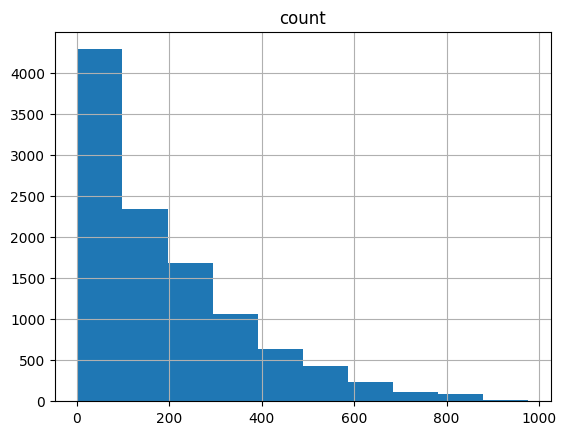

In [39]:
# 실제값의 분포를 시각화해봄
y_target=pd.DataFrame(y_target)
print(y_target)
y_target.hist()

array([[<Axes: title={'center': 'count'}>]], dtype=object)

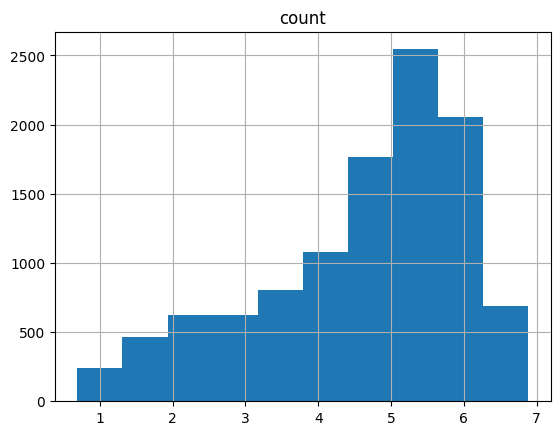

In [40]:
# count (0~200) 에 많이 몰려 있으므로, 로그함수로 정규분포로 data 변환
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [43]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
# 로그 변환된 dataset로 Linear Regression 함수를 써서 학습,예측
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 0.978, RMSE: 162.594, MAE: 109.286


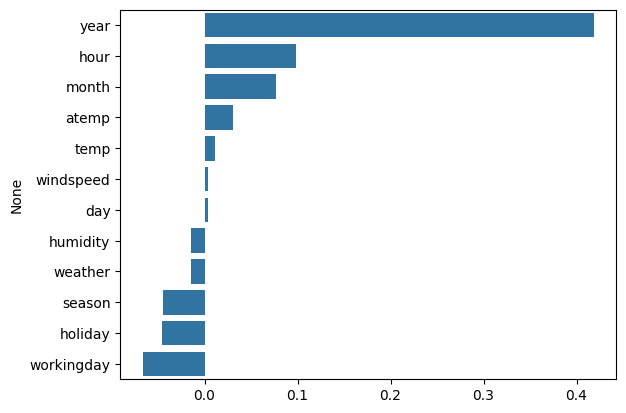

In [46]:
# 개별 features들의 인코딩을 위해 각 feature의 회귀 계수 값을 시각화
# Get the coefficient (it's a single value since y_target_log is a single column)
coef_value = lr_reg.coef_[0]

# Create a Series with the correct index
coef = pd.Series(coef_value, index=X_features.columns) # Assuming X_features has the correct columns

coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')
# Year, hour, month는 category type feature 이므로 (큰 숫자가 큰 영향력을 의미하지 않음), One Hot Encoding 적용

In [95]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding

# Train Dataset에는 1일~19일까지 있고,  Test Dataset에는 20일~31일까지 있으므로, Train Datasetdp 없는 day까지 encoding
X_features['day'] = pd.Categorical(X_features['day'], categories=range(1, 31))

X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [96]:
# One Hot Encoding 된 dataset 확인 - 84 columns로 늘어남.
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0000,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10882,14.76,17.425,57,15.0013,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10883,13.94,15.910,61,15.0013,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
10884,13.94,17.425,61,6.0032,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False


In [97]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# 선형 회귀 model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

# One Hot Encoding 이후 RMSLE 값이 많이 떨어짐.

### LinearRegression ###
RMSLE: 0.564, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.564, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.607, RMSE: 113.219, MAE: 72.803


<Axes: ylabel='None'>

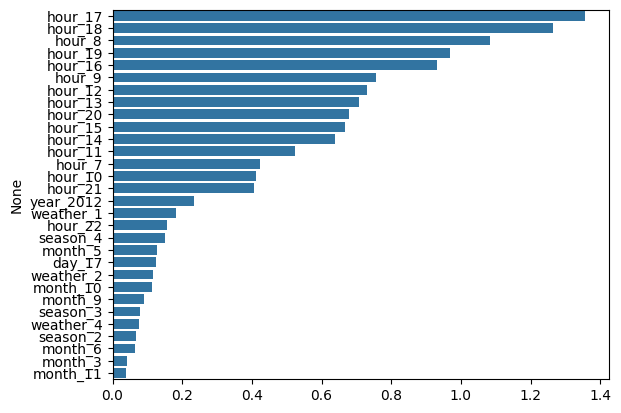

In [98]:
# 84개 feature의 회귀 계수 값 확인

# lr_reg.coef_ has a shape of (1, 84), so we need to flatten it
coef = pd.Series(lr_reg.coef_[0], index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:30]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# Hour, Season, Weather의 회귀 계수 값이 높음

In [99]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 회귀 트리를 이용해, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### RandomForestRegressor ###
RMSLE: 0.334, RMSE: 50.395, MAE: 31.164


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


### GradientBoostingRegressor ###
RMSLE: 0.310, RMSE: 53.337, MAE: 32.744
### XGBRegressor ###
RMSLE: 0.318, RMSE: 51.475, MAE: 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### LGBMRegressor ###
RMSLE: 0.299, RMSE: 47.215, MAE: 29.029


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Step 4 하이퍼 파라미터 튜닝 방법 가이드

우선 무슨 파라미터가 있는지 알아보자
검색을 해봅시다
공식문서나, 정리된 블로그를 찾아봅시다

아래는 그냥 구글에 lgbm 하이퍼 파라미터를 검색해봤을때 나온 블로그 하나를 예시로 넣어두었습니다

https://zzinnam.tistory.com/entry/lightgbm-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC

In [60]:
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# 각 모델에 대한 파라미터 그리드
param_grids = {
        'n_estimators': [500],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [2, 4, 8, 16],
        'num_leaves': [31, 50, 70]
    }

model = LGBMRegressor()

# Define the rmsle function
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids,
        n_iter=10,
        scoring=rmsle_scorer,
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
search.fit(X_train.values, y_train.values)
best_model = search.best_estimator_

print("Best Parameters:", search.best_params_)
get_model_predict(best_model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
Best Parameters: {'num_leaves': 31, 'n_estimators': 500, 'max_depth': 16, 'learning_rate': 0.1}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### LGBMRegressor ###
RMSLE: 0.296, RMSE: 46.495, MAE: 28.726


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 평가 결과

최적의 model은  LGBMRegressor

Best Parameters: {'num_leaves': 31, 'n_estimators': 500, 'max_depth': 16, 'learning_rate': 0.1}

RMSLE: 0.296, RMSE: 46.495, MAE: 28.726

디폴트 값 (RMSLE: 0.299,  RMSE : 47.215,  MAE : 29,029) 보다는 조금더 좋아졌다.

In [87]:
## test_data를 받아오기
test = pd.read_csv('/content/sample_data/bike_sharing_demand_test.csv')

# train과 같은 전처리를 진행해보자

이것을 하다보면 엄청난 문제에 직면을 하게되는데  
그것은 바로 train data는 day가 1-19일까지   
그리고 test data는 day가 20-31일까지라서  
일반 onehot encoding을 하면 열개수가 달라진다는 사실이다...

일단 카테고리 범위를 지정해주고 더미를 만들어주자! 위에 train도 바꿔주는걸 잊지말자

In [88]:
# train과 같은 전처리를 진행해보자
test['datetime'] = test.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
test['year'] = test.datetime.apply(lambda x : x.year)
test['month'] = test.datetime.apply(lambda x : x.month)
test['day'] = test.datetime.apply(lambda x : x.day)
test['hour'] = test.datetime.apply(lambda x: x.hour)
test.head(3)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [89]:
# 이미 테스트 데이터셋에는 casual, registered 가 빠져있음
drop_columns = ['datetime']
test.drop(drop_columns, axis=1,inplace=True)


# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
test['day'] = pd.Categorical(test['day'], categories=range(1, 31))
test_ohe = pd.get_dummies(test, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])
test_ohe.head(3)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,10.66,11.365,56,26.0027,True,False,True,False,False,False,...,False,True,True,False,False,False,True,False,False,False
1,10.66,13.635,56,0.0000,True,False,True,False,False,False,...,False,True,True,False,False,False,True,False,False,False
2,10.66,13.635,56,0.0000,True,False,True,False,False,False,...,False,True,True,False,False,False,True,False,False,False


In [90]:
## sample_data를 받아오기
sample = pd.read_csv('/content/sample_data/sampleSubmission.csv')

# count가 0으로 차있는 sample
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [91]:
# 테스트 데이터셋을 예측
pred = best_model.predict(test_ohe)
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(pred)

# sample 파일에 예측 값을 넣어주고
sample["count"] = pred_exp

# csv로 저장하기
sample.to_csv("./submission.csv", index=False)

In [94]:
sample

,datetime,count
0,2011-01-20 00:00:00,10.976623
1,2011-01-20 01:00:00,4.077675
2,2011-01-20 02:00:00,2.431671
3,2011-01-20 03:00:00,2.986596
4,2011-01-20 04:00:00,1.544623
...,...,...
6488,2012-12-31 19:00:00,247.156714
6489,2012-12-31 20:00:00,167.401570
6490,2012-12-31 21:00:00,120.760211
6491,2012-12-31 22:00:00,95.814716


In [93]:
# 왼쪽에 생긴 submission.csv를 다운로드 받아서 캐글에 제출
